In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.tabular.all import *
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
df = pd.read_csv('/kaggle/input/brain-stroke-dataset/brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [25]:
zeros = df[df['stroke'] == 0]
ones = df[df['stroke'] == 1]

# Downsample the 0's to match the number of 1's
downsampled_zeros = zeros.sample(n=len(ones), random_state=42)

# Concatenate the downsampled 0's with the original 1's
downsampled_df = pd.concat([downsampled_zeros, ones])

# Shuffle the resulting DataFrame to mix 0's and 1's
D_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the result
print(D_df['stroke'].value_counts())

stroke
1    248
0    248
Name: count, dtype: int64


In [7]:
D_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,59.0,0,0,Yes,Private,Rural,76.15,30.2,Unknown,1
1,Male,12.0,0,0,No,children,Urban,86.86,25.4,never smoked,0
2,Female,69.0,0,1,No,Private,Urban,193.45,34.5,never smoked,0
3,Male,31.0,0,0,No,Private,Rural,95.62,32.0,smokes,0
4,Male,58.0,0,0,Yes,Govt_job,Urban,101.05,31.4,Unknown,0


In [8]:
D_df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
491,Male,13.0,0,0,No,children,Urban,58.86,16.9,never smoked,0
492,Female,65.0,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
493,Female,58.0,0,0,Yes,Private,Rural,59.86,28.0,formerly smoked,1
494,Female,81.0,0,0,Yes,Private,Rural,184.40,27.5,never smoked,1
495,Male,51.0,0,1,Yes,Self-employed,Urban,187.47,34.2,never smoked,0


In [9]:
D_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             496 non-null    object 
 1   age                496 non-null    float64
 2   hypertension       496 non-null    int64  
 3   heart_disease      496 non-null    int64  
 4   ever_married       496 non-null    object 
 5   work_type          496 non-null    object 
 6   Residence_type     496 non-null    object 
 7   avg_glucose_level  496 non-null    float64
 8   bmi                496 non-null    float64
 9   smoking_status     496 non-null    object 
 10  stroke             496 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 42.8+ KB


In [10]:
D_df['smoking_status'].unique()

array(['Unknown', 'never smoked', 'smokes', 'formerly smoked'],
      dtype=object)

In [11]:
D_df['work_type'].unique()

array(['Private', 'children', 'Govt_job', 'Self-employed'], dtype=object)

In [12]:
D_df['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [27]:
d={'Male':1,'Female':0}
D_df['gender'] = D_df['gender'].map(d)

In [28]:
d={'Yes':1,'No':0}
D_df['ever_married'] = D_df['ever_married'].map(d)

In [29]:
d={'Private':0,'Self-employed':1, 'Govt_job':2, 'children':3}
D_df['work_type'] = D_df['work_type'].map(d)

In [30]:
d={'Urban':0,'Rural':1}
D_df['Residence_type'] = D_df['Residence_type'].map(d)

In [31]:
d={'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}
D_df['smoking_status'] = D_df['smoking_status'].map(d)


In [20]:
D_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [32]:
D_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,59.0,0,0,1,0,1,76.15,30.2,3,1
1,1,12.0,0,0,0,3,0,86.86,25.4,1,0
2,0,69.0,0,1,0,0,0,193.45,34.5,1,0
3,1,31.0,0,0,0,0,1,95.62,32.0,2,0
4,1,58.0,0,0,1,2,0,101.05,31.4,3,0


In [33]:
data = D_df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,59.0,0,0,1,0,1,76.15,30.2,3,1
1,1,12.0,0,0,0,3,0,86.86,25.4,1,0
2,0,69.0,0,1,0,0,0,193.45,34.5,1,0
3,1,31.0,0,0,0,0,1,95.62,32.0,2,0
4,1,58.0,0,0,1,2,0,101.05,31.4,3,0


In [34]:
D_df['stroke'].value_counts()

stroke
1    248
0    248
Name: count, dtype: int64

In [35]:
X = data.drop(['stroke'],axis=1)
y = data['stroke']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
56,0,72.00,0,0,1,0,1,97.92,26.9,2
227,1,43.00,0,0,1,0,0,81.94,27.7,2
391,0,72.00,1,0,1,0,1,74.63,23.1,0
329,0,0.32,0,0,0,3,1,73.71,16.2,3
220,1,65.00,0,0,1,1,0,66.69,21.5,1
...,...,...,...,...,...,...,...,...,...,...
106,0,39.00,0,0,1,0,0,83.24,26.3,1
270,0,59.00,0,0,1,1,0,77.60,23.4,3
348,1,69.00,0,0,1,0,1,93.81,28.5,3
435,0,68.00,1,0,0,1,0,79.79,29.7,1


In [37]:
y_train

56     1
227    0
391    1
329    0
220    0
      ..
106    1
270    0
348    1
435    1
102    1
Name: stroke, Length: 396, dtype: int64

In [38]:
y_test.head()

457    0
73     0
231    0
175    1
237    0
Name: stroke, dtype: int64

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)
print(y_pred)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1]
Accuracy: 0.68


In [46]:
gender = int(input("Enter value for gender "))
age = float(input("Enter value for age"))
hypertension = int(input("Enter value for hypertension "))
heart_disease = int(input("Enter value for heart disease "))
ever_married = int(input("Enter value for ever married "))
work_type = int(input("Enter value for work type"))
Residence_type = int(input("Enter value for residence type "))
avg_glucose_level = float(input("Enter value for glucose level "))
bmi = float(input("Enter value for bmi "))
smoking_status = int(input("Enter value for smoking status"))

Enter value for gender  0
Enter value for age 80.0
Enter value for hypertension  0
Enter value for heart disease  0
Enter value for ever married  1
Enter value for work type 0
Enter value for residence type  1
Enter value for glucose level  288.2
Enter value for bmi  32.5
Enter value for smoking status 2


In [47]:
import warnings
warnings.filterwarnings("ignore")
input_data = [[gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status]]  # Add more features as needed
print(input_data)
# Scale the input data using the same scaler you used during training
input_data_scaled = scaler.transform(input_data)
print(input_data_scaled)

# Make predictions
prediction = model.predict(input_data_scaled)

# Print the prediction
print("Prediction:", prediction)

[[0, 80.0, 0, 0, 1, 0, 1, 288.2, 32.5, 2]]
[[-0.87177979  1.10976091 -0.48336824 -0.37577969  0.55401326 -0.73266905
   1.10104065  3.00469927  0.47859786  0.49123321]]
Prediction: [1]


In [48]:
D_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,496.0,0.437500,0.496579,0.00,0.0000,0.000,1.0,1.00
age,496.0,55.571935,22.264196,0.16,43.0000,60.000,75.0,82.00
hypertension,496.0,0.197581,0.398576,0.00,0.0000,0.000,0.0,1.00
heart_disease,496.0,0.127016,0.333327,0.00,0.0000,0.000,0.0,1.00
ever_married,496.0,0.774194,0.418534,0.00,1.0000,1.000,1.0,1.00
work_type,496.0,0.709677,0.980820,0.00,0.0000,0.000,1.0,3.00
Residence_type,496.0,0.455645,0.498532,0.00,0.0000,0.000,1.0,1.00
avg_glucose_level,496.0,121.470423,57.028690,55.35,78.8075,96.975,167.2,271.74
bmi,496.0,29.662702,6.302836,15.10,25.5750,29.450,33.3,48.90
smoking_status,496.0,1.451613,1.066324,0.00,1.0000,1.000,2.0,3.00


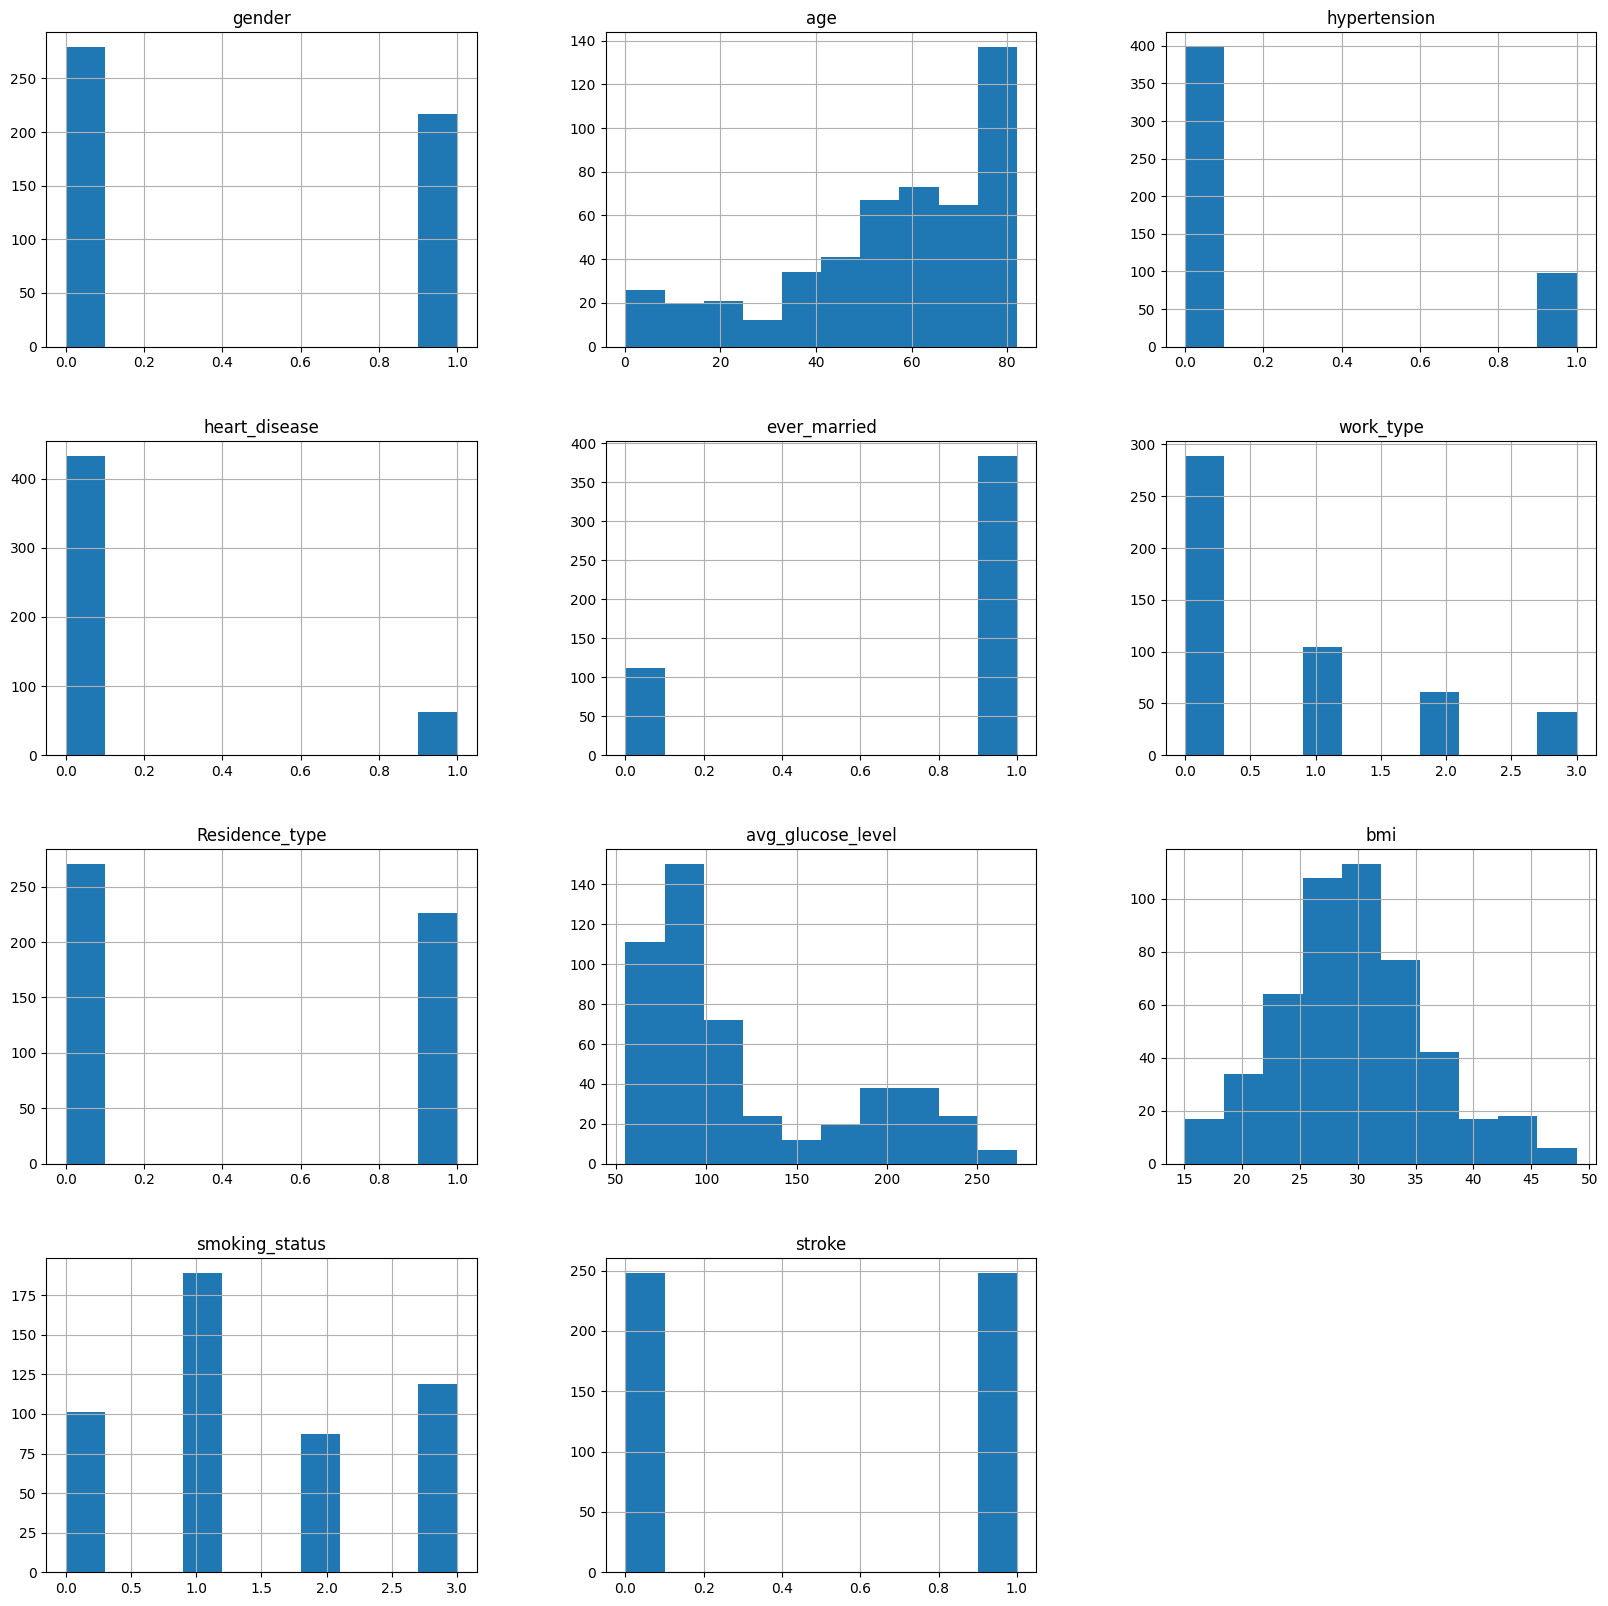

In [51]:
histogram_df = D_df.hist(figsize=(20, 20))